[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Deep_Learning_Reuter_Dataset.ipynb)

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]]) 

557056/550378 [==============================] - 1s 2us/step


In [6]:
train_labels[10]

3

In [0]:
import numpy as np

In [0]:
def vectorize_sequence(sequences,dimensions=10000):
  results=np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results


In [0]:
x_train= vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
def to_one_hot(labels,dimensions=46):
  results = np.zeros((len(labels),dimensions))
  for i, sequence in enumerate(labels):
    results[i,sequence] = 1
  return results

In [0]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val = y_train[:1000]
partial_y_train =y_train[1000:]

In [22]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.6071 - acc: 0.4917 - val_loss: 1.6845 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.4366 - acc: 0.6853 - val_loss: 1.3055 - val_acc: 0.6910
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0822 - acc: 0.7663 - val_loss: 1.1322 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.8702 - acc: 0.8066 - val_loss: 1.0504 - val_acc: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.6946 - acc: 0.8483 - val_loss: 0.9924 - val_acc: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5628 - acc: 0.8746 - val_loss: 0.9633 - val_acc: 0.7870
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.4577 - acc: 0.8984 - val_loss: 0.9460 - val_acc: 0.8090


7982/7982 [==============================] - 1s 144us/step - loss: 0.3020 - acc: 0.9355 - val_loss: 1.1865 - val_acc: 0.7530
Epoch 10/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.2578 - acc: 0.9406 - val_loss: 0.9738 - val_acc: 0.8080
Epoch 11/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.2236 - acc: 0.9468 - val_loss: 0.9713 - val_acc: 0.8190
Epoch 12/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1912 - acc: 0.9515 - val_loss: 1.0743 - val_acc: 0.7920
Epoch 13/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.1803 - acc: 0.9528 - val_loss: 1.0669 - val_acc: 0.8030
Epoch 14/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1585 - acc: 0.9563 - val_loss: 1.0719 - val_acc: 0.8030
Epoch 15/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.1500 - acc: 0.9563 - val_loss: 1.1108 - val_acc: 0.8040
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 146us/step - loss: 0.1303 - acc: 0.9568 - val_loss: 1.1479 - val_acc: 0.8060
Epoch 19/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1251 - acc: 0.9593 - val_loss: 1.1671 - val_acc: 0.8050
Epoch 20/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1238 - acc: 0.9580 - val_loss: 1.1849 - val_acc: 0.7990


In [0]:
import matplotlib.pyplot as plt

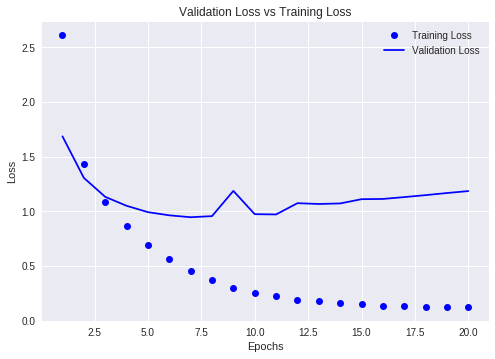

In [24]:
loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Validation Loss vs Training Loss')
plt.legend()
plt.show()

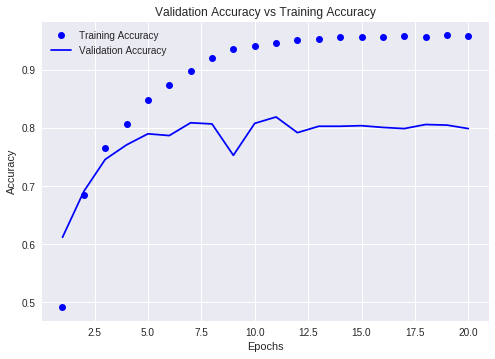

In [25]:
loss= history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,loss,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()
plt.show()

In [27]:
model =Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 134us/step - loss: 2.4720 - acc: 0.4990 - val_loss: 1.6280 - val_acc: 0.6250
Epoch 2/9
7982/7982 [==============================] - 1s 123us/step - loss: 1.3973 - acc: 0.6892 - val_loss: 1.3111 - val_acc: 0.6990
Epoch 3/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.0649 - acc: 0.7603 - val_loss: 1.1367 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.8301 - acc: 0.8193 - val_loss: 1.0201 - val_acc: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.6595 - acc: 0.8543 - val_loss: 0.9816 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.5131 - acc: 0.8886 - val_loss: 0.9839 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.4036 - acc: 0.9153 - val_loss: 0.9984 - val_acc: 0.7920
Epoch 8

2246/2246 [==============================] - 0s 90us/step


In [28]:
results

[1.1488208590292655, 0.7582368655918118]